In [1]:
pip install highlight-text

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import highlight_text 

In [3]:
# the famous import font code to use Andale Mono
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [4]:
#Import CSV from FBref(from statbomb) from local

df = pd.read_csv('Shooting for Top 5 Leages - Sheet1.csv')

In [5]:
df.head()

,Rk,Player,Pos,Squad,90s,Gls,Sh,SoT,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,1,Max Aarons\774cf58b,DF,Norwich City,16.0,0,9,2,0.56,0.12,0.00,0.00,20.2,0.6,0.6,0.06,-0.6,-0.6
1,2,Che Adams\f2bf1b0f,FW,Southampton,9.5,3,21,11,2.20,1.15,0.14,0.27,14.5,2.4,2.4,0.11,0.6,0.6
2,3,Rayan Aït Nouri\9b398aea,DF,Wolves,8.0,0,6,2,0.75,0.25,0.00,0.00,15.1,0.3,0.3,0.05,-0.3,-0.3
3,4,Kristoffer Ajer\a8c0acb7,DF,Brentford,6.3,0,2,0,0.32,0.00,0.00,NaN,9.9,0.2,0.2,0.09,-0.2,-0.2
4,5,Nathan Aké\eaeca114,DF,Manchester City,4.2,0,1,0,0.24,0.00,0.00,NaN,6.0,0.2,0.2,0.20,-0.2,-0.2


In [6]:
#To create npxG/90
#Which measures sum of shot qualities per 90 minutes 

df['npxG/90'] = df['npxG']/df['90s']

#To drop the 'Rk' column
df.drop('Rk', axis = 1, inplace = True)

#To split player names
df['Player'] = df['Player'].str.split('\\', expand=True)[0]


In [7]:
#To filter out players that have not played as often
df = df[df['90s']>=6.5]

#To get rid of goalkeepers and defenders and midfielders
df = df[df['Pos']!= 'GK']
df = df[df['Pos']!= 'MF']
df = df[df['Pos']!= 'DFMF']
df = df[df['Pos']!= 'MFDF']
df = df[df['Pos']!= 'DFFW']
df = df[df['Pos']!= 'DF'].reset_index()

In [8]:
df.head(50)

,index,Player,Pos,Squad,90s,Gls,Sh,SoT,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG,npxG/90
0,1,Che Adams,FW,Southampton,9.5,3,21,11,2.20,1.15,0.14,0.27,14.5,2.4,2.4,0.11,0.6,0.6,0.252632
1,16,Michail Antonio,FW,West Ham,14.9,6,44,12,2.94,0.80,0.14,0.50,15.2,5.4,5.2,0.12,0.6,0.8,0.348993
2,18,Adam Armstrong,FWMF,Southampton,12.1,2,40,13,3.31,1.07,0.05,0.15,17.6,3.8,3.8,0.10,-1.8,-1.8,0.314050
3,21,Pierre-Emerick Aubameyang,FW,Arsenal,11.5,4,33,16,2.86,1.39,0.12,0.25,14.2,5.8,4.1,0.13,-1.8,-0.1,0.356522
4,22,Jordan Ayew,FW,Crystal Palace,10.8,0,21,3,1.94,0.28,0.00,0.00,17.6,1.9,1.9,0.09,-1.9,-1.9,0.175926
5,33,Harvey Barnes,FWMF,Leicester City,11.4,2,27,12,2.37,1.05,0.07,0.17,15.8,2.3,2.3,0.09,-0.3,-0.3,0.201754
6,38,Saïd Benrahma,FWMF,West Ham,13.2,3,35,12,2.65,0.91,0.09,0.25,20.0,2.3,2.3,0.06,0.7,0.7,0.174242
7,39,Christian Benteke,FW,Crystal Palace,10.7,4,35,11,3.26,1.03,0.11,0.36,11.4,5.0,5.0,0.14,-1.0,-1.0,0.467290
8,45,Jarrod Bowen,FW,West Ham,14.6,3,39,15,2.67,1.03,0.08,0.20,16.7,4.8,4.8,0.12,-1.8,-1.8,0.328767
9,49,Emi Buendía,MFFW,Aston Villa,9.0,1,12,3,1.33,0.33,0.08,0.33,17.3,1.1,1.1,0.09,-0.1,-0.1,0.122222


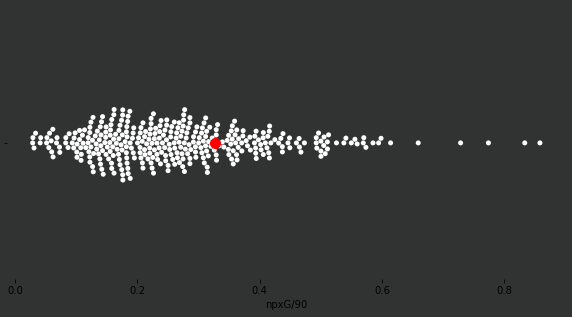

In [9]:
#To set color for background and color of text
background = '#313332'
text_color = 'white'

#To set the background and axis ticks to the colors above
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#To get rid of axis lines
spines = ['top', 'bottom', 'left', 'right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
sns.swarmplot(x='npxG/90', data = df, color = 'white',zorder=1)


#Plot Grealish
plt.scatter(0.326531,y=0,c='red',s=100,zorder=2)

In [10]:
#To create list of metrics we are using
metrics = ['npxG/90', 'xG', 'Gls', 'npxG/Sh', 'Dist', 'np:G-xG']

/Users/leonardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/leonardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


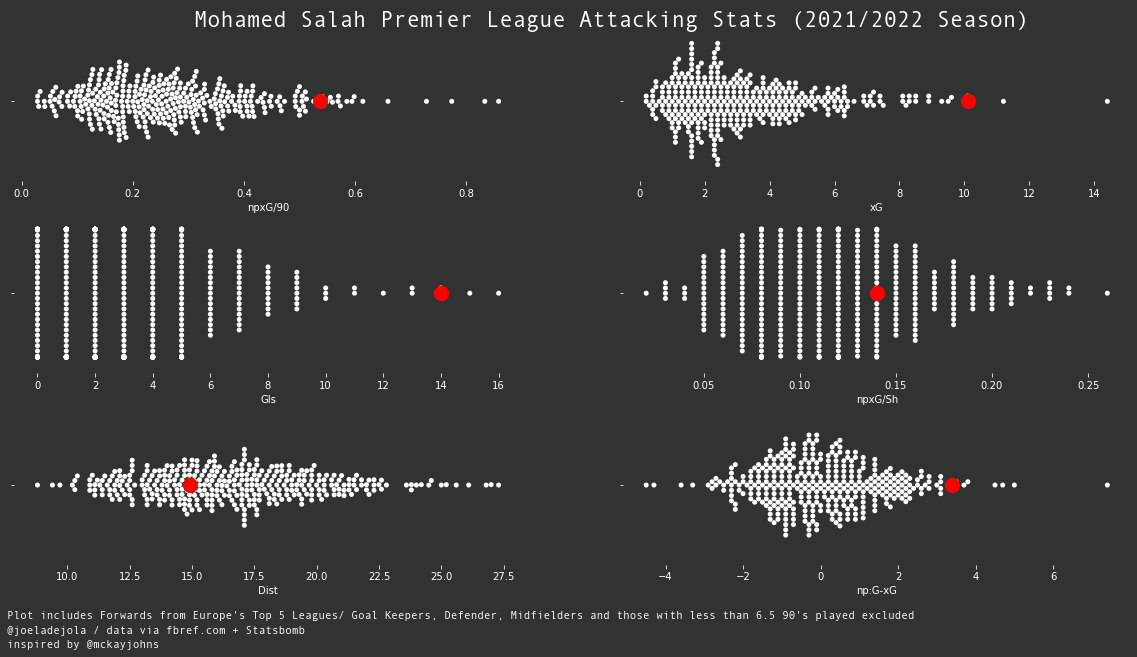

In [29]:
#Layout for the grid
fig,axes = plt.subplots(3,2,figsize=(20,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#create a list of comparisons
counter=0
counter2=0
met_counter = 0

#Set up for-loop to plot layout of the metrics one by one
for i,ax in zip(df['Player'],axes.flatten()):
    ax.set_facecolor(background)
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
    
#To remove the spines of each plot again
    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)
            
#For loop to begin the plots for the first metric then end it after it completes the len of metrics          
    sns.swarmplot(x=metrics[met_counter],data=df,ax=axes[counter,counter2],zorder=1,color='white')
    ax.set_xlabel(f'{metrics[met_counter]}',c=text_color)
    
    for x in range(len(df['Player'])):
        if df['Player'][x] == 'Mohamed Salah':
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=200,c='red',zorder=2)
                        
    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue
    if counter2 == 1:
        counter2 = 0
        counter+=1

s='<Mohamed Salah> Premier League Attacking Stats (2021/2022 Season)'
highlight_text.fig_text(s=s,
                x=.25, y=.88,
                #highlight_weights = ['bold'],
                fontsize=22,
                fontfamily = 'Andale Mono',
                color = text_color,
                #highlight_colours = ['#6CABDD'],
                va='center'
               )

fig.text(.12,.05,"Plot includes Forwards from Europe's Top 5 Leagues/ Goal Keepers, Defender, Midfielders and those with less than 6.5 90's played excluded",fontsize=11, fontfamily='Andale Mono',color=text_color)
fig.text(.12,.03,"@joeladejola / data via fbref.com + Statsbomb", fontstyle='italic',fontsize=11, fontfamily='Andale Mono',color=text_color)
fig.text(.12,.01,"inspired by @mckayjohns", fontstyle='italic',fontsize=11, fontfamily='Andale Mono',color=text_color)


plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)